<a href="https://colab.research.google.com/github/Mangai2024/Mangai2024/blob/main/Car_Sales_fill_the_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
car_sales_data=pd.read_csv("/content/drive/MyDrive/Python /Car_sales.csv")
car_sales_data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [7]:
#Check if the column "__year_resale_value" exists
if "__year_resale_value" in car_sales_data.columns:
    # Calculate the average resale value
    average_resale_value = car_sales_data["__year_resale_value"].mean()
    #Fill missing values in the "__year_resale_value" column with the calculated average
    car_sales_data["__year_resale_value"] = car_sales_data["__year_resale_value"].fillna(average_resale_value)
    print(f"Missing values in '__year_resale_value' have been filled with the average value: {average_resale_value:.2f}")

else:
    print("Column '__year_resale_value' not found in the dataset.")



Missing values in '__year_resale_value' have been filled with the average value: 18.07


 **Function to categorize cars based on Price_in_thousands (e.g., low, medium, high) and add it as a new column.**


In [58]:
import pandas as pd

In [59]:
# Load the dataset
file_path = '/content/drive/MyDrive/Python /Car_sales.csv'  # Update this path as needed
car_sales_data = pd.read_csv(file_path)

In [60]:
def categorize_price(price, low_threshold=20, high_threshold=50):
    """
    Categorize price into 'Low', 'Medium', or 'High'.

    Parameters:
    - price (float): The price of the car.
    - low_threshold (float): Threshold for low category.
    - high_threshold (float): Threshold for high category.

    Returns:
    - str: The category ('Low', 'Medium', 'High').
    """
    if price < low_threshold:
        return 'Low'
    elif price < high_threshold:
        return 'Medium'
    else:
        return 'High'

In [61]:
# Apply the function to the 'Price_in_thousands' column
car_sales_data['Price_Category'] = car_sales_data['Price_in_thousands'].apply(categorize_price)

In [62]:
# Save the updated dataset to a new file
output_file = '/content/drive/MyDrive/Price gategory .csv'
car_sales_data.to_csv(output_file, index=False)

# Display a preview of the updated data

In [63]:
print(car_sales_data[['Manufacturer', 'Model', 'Price_in_thousands', 'Price_Category']].head())

  Manufacturer    Model  Price_in_thousands Price_Category
0        Acura  Integra               21.50         Medium
1        Acura       TL               28.40         Medium
2        Acura       CL                 NaN           High
3        Acura       RL               42.00         Medium
4         Audi       A4               23.99         Medium


Relationship between Engine_size and Fuel_efficiency using a scatter plot

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

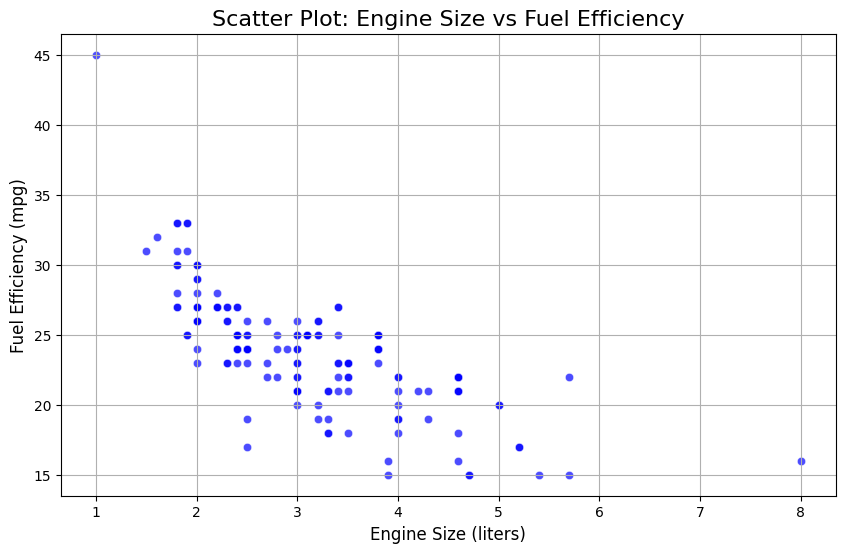

In [7]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Python /Car_sales.csv')

# Check if the required columns exist
if 'Engine_size' in df.columns and 'Fuel_efficiency' in df.columns:
    # Remove rows with missing values in the relevant columns
    df = df[['Engine_size', 'Fuel_efficiency']].dropna()

    # Create the scatter plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Engine_size', y='Fuel_efficiency', color='blue', alpha=0.7)

    # Add labels and title
    plt.title('Scatter Plot: Engine Size vs Fuel Efficiency', fontsize=16)
    plt.xlabel('Engine Size (liters)', fontsize=12)
    plt.ylabel('Fuel Efficiency (mpg)', fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Columns 'Engine_size' and/or 'Fuel_efficiency' are missing in the dataset.")


Find the car model with the highest Power_perf_factor



In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Python /Car_sales.csv')

# Check if the 'Power_perf_factor' column exists
if 'Power_perf_factor' in df.columns and 'Model' in df.columns:
    # Find the index of the maximum Power_perf_factor
    max_index = df['Power_perf_factor'].idxmax()

    # Get the car model and its Power_perf_factor
    max_power_perf_model = df.loc[max_index, 'Model']
    max_power_perf_value = df.loc[max_index, 'Power_perf_factor']

    print(f"The car model with the highest Power_perf_factor is '{max_power_perf_model}' with a value of {max_power_perf_value}.")
else:
    print("The 'Power_perf_factor' or 'Model' column is missing in the dataset.")


The car model with the highest Power_perf_factor is 'Viper' with a value of 188.144323.
